# Problem Statement-
To understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
#import all libraries-
#numpy for numerical operations
#pandas for dataframe operations
#matplotlib and seaborn for data visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# read the Delhivery data comma seperated file and create panda dataframe

df=pd.read_csv("delhivery_data.csv")

In [3]:
# checking top 5 rows

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
 # checking bottom 5 rows
    
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [5]:
#gives the shape of dataframe

df.shape

#144867 rows and 24 columns in the dataset

(144867, 24)

In [6]:
#bird eye view of complete dataset..
#It gives all columns with teir data types nad number of values present in that column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
data                              144867 non-null object
trip_creation_time                144867 non-null object
route_schedule_uuid               144867 non-null object
route_type                        144867 non-null object
trip_uuid                         144867 non-null object
source_center                     144867 non-null object
source_name                       144574 non-null object
destination_center                144867 non-null object
destination_name                  144606 non-null object
od_start_time                     144867 non-null object
od_end_time                       144867 non-null object
start_scan_to_end_scan            144867 non-null float64
is_cutoff                         144867 non-null bool
cutoff_factor                     144867 non-null int64
cutoff_timestamp                  144867 non-null object
actual_distance_to_destination    14

#### Statistical Summary

In [7]:
#describes statistical summary of dataframe.
#count of no. of records,mean of continuous values,std,
#min continuous value, max continuous value etc

df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
#gives descrption of object type of data

df.describe(include="object")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-29 05:04:57.639067,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [9]:
# All column names

for i in df.columns:
    print(i)

data
trip_creation_time
route_schedule_uuid
route_type
trip_uuid
source_center
source_name
destination_center
destination_name
od_start_time
od_end_time
start_scan_to_end_scan
is_cutoff
cutoff_factor
cutoff_timestamp
actual_distance_to_destination
actual_time
osrm_time
osrm_distance
factor
segment_actual_time
segment_osrm_time
segment_osrm_distance
segment_factor


#### Missing value detection

In [10]:
 # checking null values (missing values)

df.isna().any()

# null values are present in the dataset(source name and destination name)

data                              False
trip_creation_time                False
route_schedule_uuid               False
route_type                        False
trip_uuid                         False
source_center                     False
source_name                        True
destination_center                False
destination_name                   True
od_start_time                     False
od_end_time                       False
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                  False
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

In [11]:
#This dataframe contain some null values...

df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

Obs- Source name and destination name column contains some missing values

In [12]:
df.isnull().sum().sum()

554

Obs- Total number of missing values in dataset is 554

In [13]:
df.shape

(144867, 24)

## Handling Missing Values (Missing values Treatment)

In [14]:
# Handle missing values in the data.

df.dropna(inplace=True)

# Are there any duplicate values?

df.duplicated().sum()

0

In [15]:
#checking missing values

df.isnull().sum().sum()

0

Obs- 0 missing values present now

In [16]:
# New shape of dataset.

df.shape

(144316, 24)

### Conversion of categorical attributes to 'category' 

In [17]:
df = df.astype({"route_type":'category',"data":'category'})

# route_type and data are converted to categorical types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
data                              144316 non-null category
trip_creation_time                144316 non-null object
route_schedule_uuid               144316 non-null object
route_type                        144316 non-null category
trip_uuid                         144316 non-null object
source_center                     144316 non-null object
source_name                       144316 non-null object
destination_center                144316 non-null object
destination_name                  144316 non-null object
od_start_time                     144316 non-null object
od_end_time                       144316 non-null object
start_scan_to_end_scan            144316 non-null float64
is_cutoff                         144316 non-null bool
cutoff_factor                     144316 non-null int64
cutoff_timestamp                  144316 non-null object
actual_distance_to_destination  

Obs- Here route_type and data are sown as category type

In [19]:
#dropping four unknown columns

df.drop(['cutoff_factor','cutoff_timestamp','is_cutoff','factor'], axis=1,inplace=True)

# Feature Engineering

In [20]:
# creating new dataframe which contains all training data

df_train = df.loc[df['data'] == 'training']

In [21]:
# creating new dataframe which contains all testing data

df_test = df.loc[df['data'] == 'test']

In [22]:
# drop data column from both dataset

df_train.drop(['data'],axis=1,inplace=True)

C:\Users\pinki\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
df_test.drop(['data'],axis=1,inplace=True)

## Basic data cleaning and exploration:

#### Merging the rows (Using inbuilt functions like groupby and aggregations)

In [24]:
df_grouped = df_train.groupby(['trip_uuid','source_center','source_name','destination_center','destination_name']).agg({'trip_creation_time':['first'],"route_schedule_uuid":['first'], "route_type":['first'],"od_start_time" : ['first'],'od_end_time' :['last'],'start_scan_to_end_scan' :['first'], 'actual_distance_to_destination' :['max'], 'actual_time': ['max'],'osrm_time':['max'],'osrm_distance' :['max'],'segment_actual_time' :['sum'],
                      'segment_osrm_time':['sum'],
                      'segment_osrm_distance':['sum']
                                                                                                                       }).reset_index()

In [25]:
df_grouped.columns = ['_'.join(col).strip() for col in df_grouped.columns.values]

In [26]:
df_grouped

,trip_uuid_,source_center_,source_name_,destination_center_,destination_name_,trip_creation_time_first,route_schedule_uuid_first,route_type_first,od_start_time_first,od_end_time_last,start_scan_to_end_scan_first,actual_distance_to_destination_max,actual_time_max,osrm_time_max,osrm_distance_max,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408
5,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270
6,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
7,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,59.530350,147.0,46.0,63.6461,147.0,45.0,63.6461
8,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,485.0,41.317614,131.0,44.0,53.5761,130.0,44.0,53.5761
9,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,26.600536,63.0,27.0,29.5696,63.0,26.0,29.5697


In [27]:
df_grouped.rename(columns={"trip_uuid_":"trip_uuid","source_center_":"source_center","source_name_":"source_name",
                           "destination_center_":"destination_center","destination_name_":"destination_name",
                           "trip_creation_time_first":"trip_creation_time","route_schedule_uuid_first":"route_schedule_uuid",
                           "route_type_first":"route_type","od_start_time_first":"od_start_time",
                           "od_end_time_last":"od_end_time",
                           "start_scan_to_end_scan_first":"start_scan_to_end_scan","actual_distance_to_destination_max":"actual_distance_to_destination",
                           "actual_time_max":"actual_time","osrm_time_max":"osrm_time","osrm_distance_max":"osrm_distance",
                           "segment_actual_time_sum":"tot_segment_actual_time","segment_osrm_time_sum":"tot_segment_osrm_time",
                           "segment_osrm_distance_sum":"tot_segment_osrm_distance"
                   }, inplace=True)

In [28]:
df_grouped = df_grouped.sort_values(by = ['trip_uuid','od_start_time'])

In [29]:
df_grouped.head()

,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance
1,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
0,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
3,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
2,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
5,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1529.0,2090.8743,2700.0,1710.0,2227.5270


In [30]:
df_final=df_grouped.groupby(['trip_uuid']).agg({'source_center':['first'],
                                      'source_name':['first'],
                                      'destination_center' :['last'],
                                      'destination_name':['last'],
                                      'trip_creation_time':['first'],
                                      'route_schedule_uuid':['first'], 
                                      'route_type':['first'],
                                      'od_start_time':['first'],
                                      'od_end_time':['last'], 
                                      'start_scan_to_end_scan':['sum'], 
                                      'actual_distance_to_destination':['sum'], 
                                      'actual_time':['sum'],
                                      'osrm_time':['sum'],
                                      'osrm_distance':['sum'],
                                      'tot_segment_actual_time':['sum'],
                                      'tot_segment_osrm_time':['sum'],
                                      'tot_segment_osrm_distance':['sum']})

In [31]:
df_final

,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance
,first,first,last,last,first,first,first,first,last,sum,sum,sum,sum,sum,sum,sum,sum
trip_uuid,,,,,,,,,,,,,,,,,
trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184
trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203


In [32]:
df_final.columns = ['_'.join(col).strip() for col in df_final.columns.values]

In [33]:
df_final.rename(columns={"source_center_first":"source_center","source_name_first":"source_name",
                           "destination_center_last":"destination_center","destination_name_last":"destination_name",
                           "trip_creation_time_first":"trip_creation_time","route_schedule_uuid_first":"route_schedule_uuid",
                           "route_type_first":"route_type","od_start_time_first":"od_start_time",
                           "od_end_time_last":"od_end_time",
                           "start_scan_to_end_scan_sum":"start_scan_to_end_scan","actual_distance_to_destination_sum":"actual_distance_to_destination",
                           "actual_time_sum":"actual_time","osrm_time_sum":"osrm_time","osrm_distance_sum":"osrm_distance",
                           "tot_segment_actual_time_sum":"tot_segment_actual_time","tot_segment_osrm_time_sum":"tot_segment_osrm_time",
                           "tot_segment_osrm_distance_sum":"tot_segment_osrm_distance"
                   }, inplace=True)

In [34]:
df_final.head()

,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,,,,
trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


### Build some features to prepare the data for actual analysis. Extract features from the below fields:

#### Destination Name: Split and extract features out of destination. City-place-code (State)

In [35]:

# split column and add new columns to df
df_final[['d_city', 'd_place','d_code']] = df_final['destination_name'].str.split('_',n=2, expand=True)
# display the dataframe
df_final[["d_code","d_state"]]=df_final["d_code"].str.split(" ",n=1,expand=True)

df_final['d_state']=df_final['d_state'].str.replace('(', '')
df_final['d_state']=df_final['d_state'].str.replace(')', '')
df_final.head()

,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,tot_segment_actual_time,tot_segment_osrm_time,tot_segment_osrm_distance,d_city,d_place,d_code,d_state
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733,Gurgaon,Bilaspur,HB,Haryana
trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,143.0,68.0,85.1110,141.0,65.0,84.1894,Chikblapur,ShntiSgr,D,Karnataka
trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678,Chandigarh,Mehmdpur,H,Punjab
trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,59.0,15.0,19.6800,59.0,16.0,19.8766,Mumbai,MiraRd,IP,Maharashtra
trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,341.0,117.0,146.7918,340.0,115.0,146.7919,Bellary,Dc (Karnataka),None,None


#### Source Name: Split and extract features out of destination. City-place-code (State)

In [36]:
    
# split column and add new columns to df
df_final[['s_city', 's_place','s_code']] = df_final['source_name'].str.split('_',n=2, expand=True)
# display the dataframe
df_final[["s_code","s_state"]]=df_final["s_code"].str.split(" ",n=1,expand=True)

df_final['s_state']=df_final['s_state'].str.replace('(', '')
df_final['s_state']=df_final['s_state'].str.replace(')', '')
df_final.head()

,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,...,tot_segment_osrm_time,tot_segment_osrm_distance,d_city,d_place,d_code,d_state,s_city,s_place,s_code,s_state
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,1008.0,1320.4733,Gurgaon,Bilaspur,HB,Haryana,Bhopal,Trnsport,H,Madhya Pradesh
trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,65.0,84.1894,Chikblapur,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I,Karnataka
trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,1941.0,2545.2678,Chandigarh,Mehmdpur,H,Punjab,Bangalore,Nelmngla,H,Karnataka
trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,16.0,19.8766,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub (Maharashtra),None,None,None
trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,115.0,146.7919,Bellary,Dc (Karnataka),None,None,Bellary,Dc (Karnataka),None,None


#### Trip_creation_time: Extract features like month, year and day etc

In [37]:
#convert trip_creation time to datetime data type

df_final['trip_creation_time'] = pd.to_datetime(df_final['trip_creation_time'])

#create new columns for year,month and day
df_final["trip_creation_year"]=df_final['trip_creation_time'].dt.year
df_final["trip_creation_month"]=df_final['trip_creation_time'].dt.month
df_final["trip_creation_day"]=df_final['trip_creation_time'].dt.day

## In-depth analysis and feature engineering:

#### Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [38]:
df_final['od_start_time'] = pd.to_datetime(df_final['od_start_time'])
df_final['od_end_time'] = pd.to_datetime(df_final['od_end_time'])

df_final['od_time_diff'] =  df_final['od_end_time']- df_final['od_start_time'] 

In [39]:
df_final["od_time_diff_min"]=pd.to_timedelta(df_final["od_time_diff"]).astype('timedelta64[m]').astype(int)

In [40]:
df_final.drop("od_time_diff",axis=1,inplace=True)

In [41]:
df_final.head()

,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,route_type,od_start_time,od_end_time,start_scan_to_end_scan,...,d_code,d_state,s_city,s_place,s_code,s_state,trip_creation_year,trip_creation_month,trip_creation_day,od_time_diff_min
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,...,HB,Haryana,Bhopal,Trnsport,H,Madhya Pradesh,2018,9,12,2260
trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,...,D,Karnataka,Tumkur,Veersagr,I,Karnataka,2018,9,12,181
trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,...,H,Punjab,Bangalore,Nelmngla,H,Karnataka,2018,9,12,3934
trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,...,IP,Maharashtra,Mumbai Hub (Maharashtra),None,None,None,2018,9,12,100
trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,...,None,None,Bellary,Dc (Karnataka),None,None,2018,9,12,718


### Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)

### Univariate Analysis

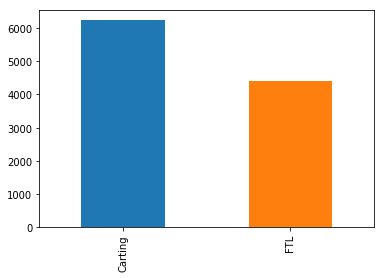

In [42]:
df_final["route_type"].value_counts().plot(kind="bar")

Obs- When compared between route types carting are more than FTL

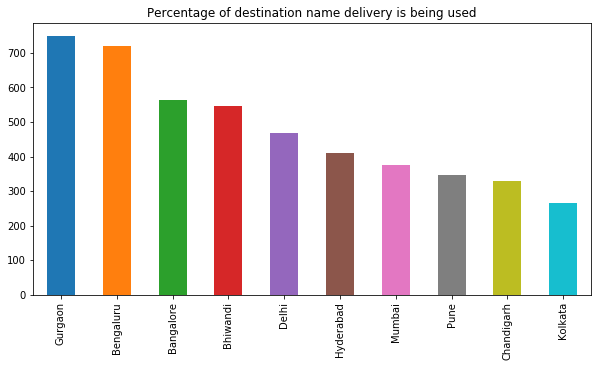

In [43]:
# Source name Analysis

df_final["s_city"].value_counts().sort_values(ascending=False)[:10,].plot(kind="bar",figsize=(10,5),title="Percentage of destination name delivery is being used")

Obs- Bangalore and bengaluru are same city but saved as different city..so replace one of them with anothers name

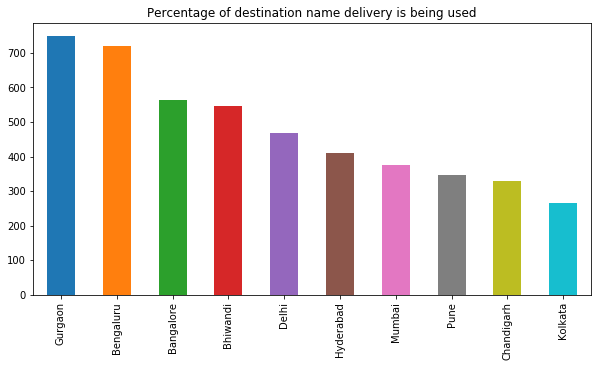

In [44]:
# Source name Analysis

df_final["s_city"].value_counts().sort_values(ascending=False)[:10,].plot(kind="bar",figsize=(10,5),title="Percentage of destination name delivery is being used")

Obs- Bangalore, Gurgaon and Bhiwandi are top three source city

In [45]:
df_final['s_city'].replace('Bengaluru','Bangalore',inplace=True)

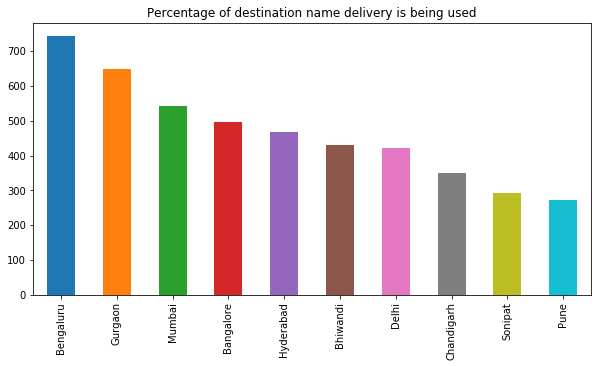

In [46]:
# Destination city Analysis

df_final["d_city"].value_counts().sort_values(ascending=False)[:10,].plot(kind="bar",figsize=(10,5),title="Percentage of destination name delivery is being used")

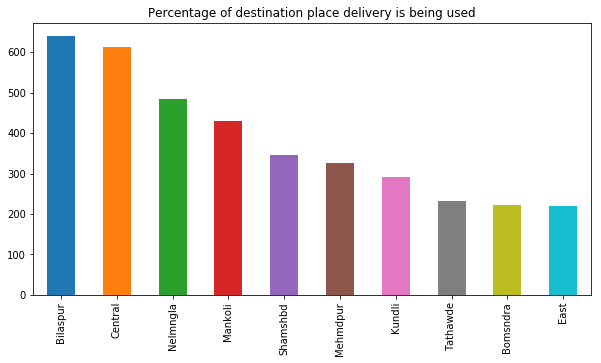

In [47]:
# Destination city Analysis

df_final["d_place"].value_counts().sort_values(ascending=False)[:10,].plot(kind="bar",figsize=(10,5),title="Percentage of destination place delivery is being used")

Obs- Bangalore, Gurgaon, Mumbai are three common cities in which delivery is being used.

In [48]:
df_final['trip_creation_day'].value_counts().sort_values(ascending=False).head(10)

18    791
15    783
13    750
12    747
21    740
22    740
17    722
14    712
20    703
25    695
Name: trip_creation_day, dtype: int64

Obs- Many deliveries isbeing done on these dates, there must be some occasional reasons or offers behind it.

C:\Users\pinki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


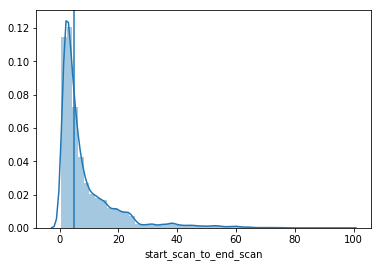

In [49]:
sns.distplot(df_final['start_scan_to_end_scan']/60)
plt.axvline(df_final['start_scan_to_end_scan'].median()/60)

### Bivariate Analysis

#### Comparison & Visualization of time and distance fields

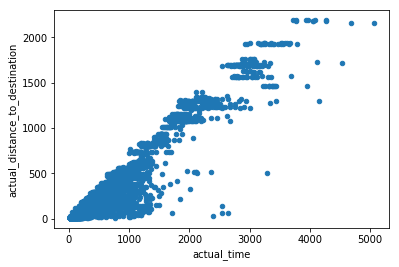

In [50]:
df_final.plot.scatter(x = 'actual_time', y = 'actual_distance_to_destination')

Obs- actual time and actual_distance_to_destination increases almost linearly except some outliers

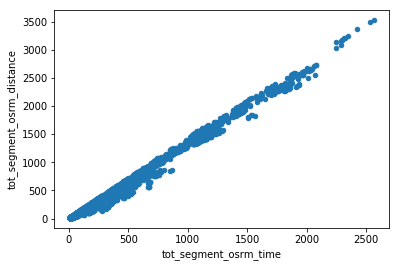

In [51]:
df_final.plot.scatter(x = 'tot_segment_osrm_time', y = 'tot_segment_osrm_distance')

Obs- tot_segment_osrm_time and tot_segment_osrm_distance increases almost linearly

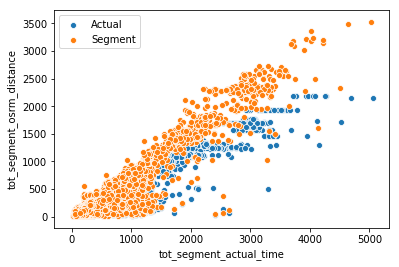

In [52]:
sns.scatterplot(x = df_final['actual_time'],y = df_final['actual_distance_to_destination'])
sns.scatterplot(x = df_final['tot_segment_actual_time'],y = df_final['tot_segment_osrm_distance'])
plt.legend(['Actual','Segment'])
plt.show()

Obs- When distance is increasing, total Segment time and  the distance is higher compared to actual time and distance .

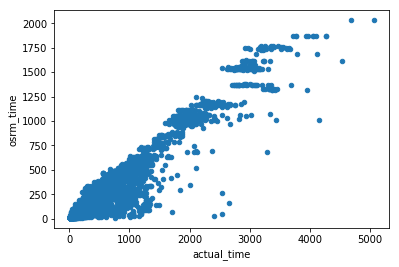

In [53]:
df_final.plot.scatter(x = 'actual_time', y = 'osrm_time')

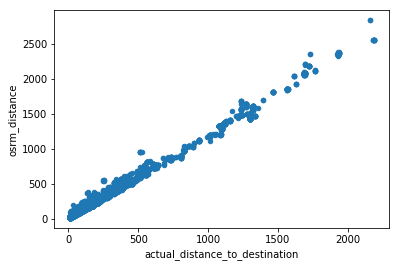

In [54]:
df_final.plot.scatter(x = 'actual_distance_to_destination', y = "osrm_distance")

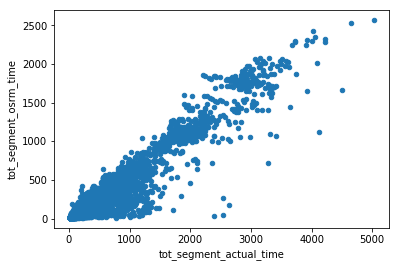

In [55]:
df_final.plot.scatter(x = 'tot_segment_actual_time', y = 'tot_segment_osrm_time')

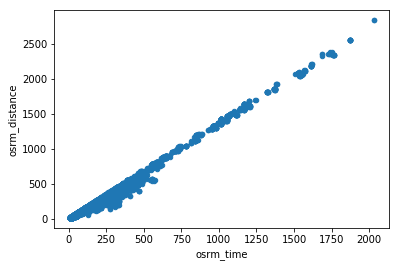

In [56]:
df_final.plot.scatter(x = 'osrm_time', y = 'osrm_distance')

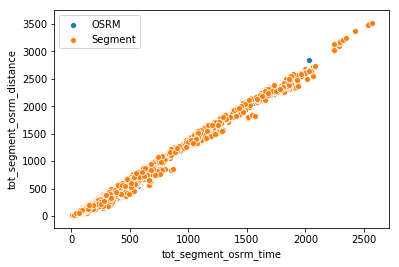

In [57]:
sns.scatterplot(x = df_final['osrm_time'],y = df_final['osrm_distance'])
sns.scatterplot(x = df_final['tot_segment_osrm_time'],y = df_final['tot_segment_osrm_distance'])
plt.legend(['OSRM','Segment'])
plt.show()

Obs-Actual osrm and segment osrm distance and time are equal as shown in above graph.

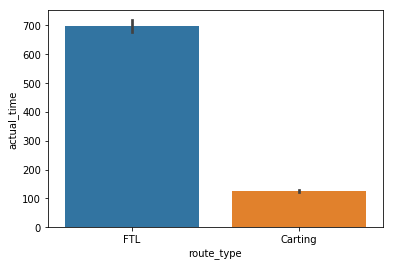

In [58]:
sns.barplot(x=df_final['route_type'],y=df_final['actual_time'])

Obs- FTL takes more time for delivery so Carting orders are deliverd much faster to the destination compared to FTL

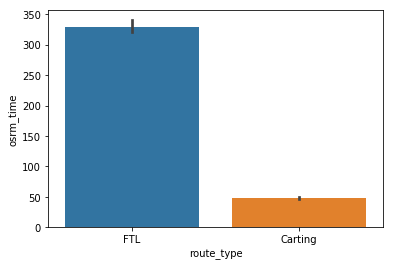

In [59]:
sns.barplot(x=df_final['route_type'],y=df_final['osrm_time'])

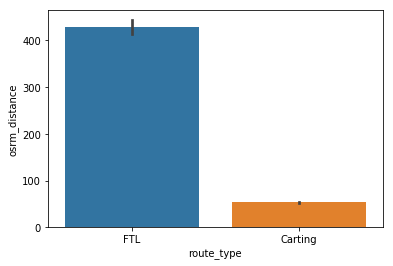

In [60]:
sns.barplot(x=df_final['route_type'],y=df_final['osrm_distance'])

Obs- FTL covers more time in delivery so for larger distances FTL is being used as compare to carting.

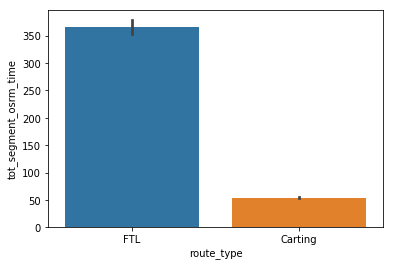

In [61]:
sns.barplot(x=df_final['route_type'],y=df_final['tot_segment_osrm_time'])

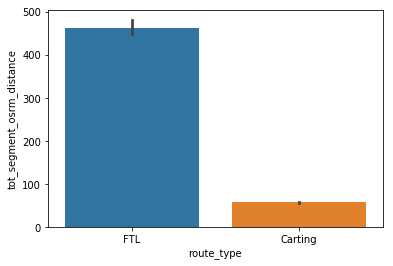

In [62]:
sns.barplot(x=df_final['route_type'],y=df_final['tot_segment_osrm_distance'])

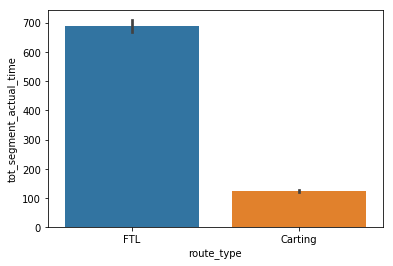

In [63]:
sns.barplot(x=df_final['route_type'],y=df_final['tot_segment_actual_time'])

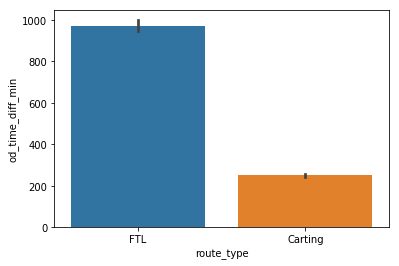

In [64]:
sns.barplot(x=df_final['route_type'],y=df_final['od_time_diff_min'])

In [65]:
df_final.groupby([df_final['s_state'],df_final['d_state']]).agg({'od_time_diff_min':['median']}).reset_index().sort_values(by=('od_time_diff_min','median')).head(10)

,s_state,d_state,od_time_diff_min
,,,median
118,Uttar Pradesh,Rajasthan,67.0
15,Dadra and Nagar Haveli,Gujarat,69.0
24,Gujarat,Dadra and Nagar Haveli,72.0
74,Maharashtra,Madhya Pradesh,96.0
96,Rajasthan,Madhya Pradesh,151.5
85,Pondicherry,Tamil Nadu,155.0
13,Chandigarh,Punjab,159.0
54,Karnataka,Karnataka,192.0
17,Delhi,Haryana,192.0


Obs- Uttar Pradesh to Rajasthan and Dadra and Nagar Haveli to Gujarat are the top two fastest deliveries.

In [66]:
df_final.groupby([df_final['destination_name'],df_final['source_name']]).agg({'destination_center':['count'],
                                                    'od_time_diff_min':['median']}).reset_index().sort_values(by =('destination_center','count'),ascending=False).head()

,destination_name,source_name,destination_center,od_time_diff_min
,,,count,median
390,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),138,933.5
218,Bengaluru_KGAirprt_HB (Karnataka),Bangalore_Nelmngla_H (Karnataka),100,181.0
1307,Muzaffrpur_Bbganj_I (Bihar),Muzaffrpur_Bbganj_I (Bihar),88,1073.0
219,Bengaluru_KGAirprt_HB (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),81,208.0
1647,Sonipat_Kundli_H (Haryana),Sonipat_Kundli_H (Haryana),76,1318.0


# Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

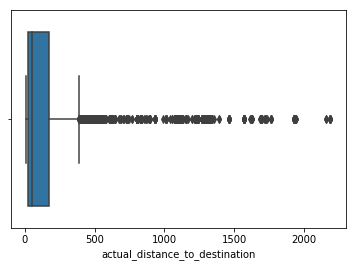

In [67]:
sns.boxplot(df_final['actual_distance_to_destination'])

In [68]:
q1=df_final['actual_distance_to_destination'].quantile(0.25)
q3=df_final['actual_distance_to_destination'].quantile(0.75)
iqr=q3-q1

In [69]:
df_final = df_final[(df_final['actual_distance_to_destination'] > q1 -1.5* iqr) & (df_final['actual_distance_to_destination'] < q3 +1.5* iqr)]

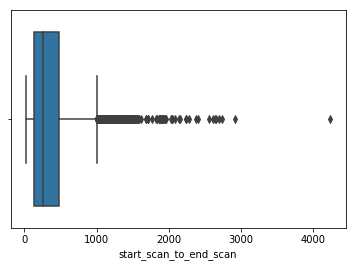

In [70]:
sns.boxplot(df_final['start_scan_to_end_scan'])

In [71]:
q1=df_final['start_scan_to_end_scan'].quantile(0.25)
q3=df_final['start_scan_to_end_scan'].quantile(0.75)
iqr=q3-q1

df_final = df_final[(df_final['start_scan_to_end_scan'] > q1 -1.5* iqr) & (df_final['actual_distance_to_destination'] < q3 +1.5* iqr)]

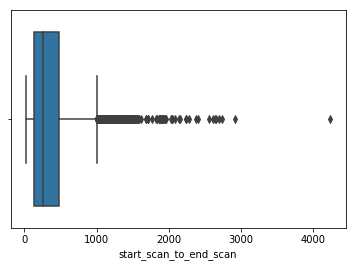

In [72]:
sns.boxplot(df_final['start_scan_to_end_scan'])

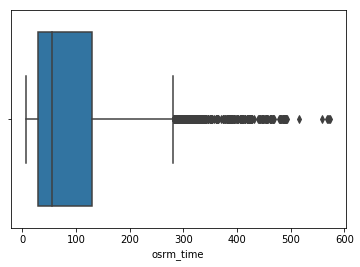

In [73]:
sns.boxplot(df_final['osrm_time'])

In [74]:
q1=df_final['osrm_time'].quantile(0.25)
q3=df_final['osrm_time'].quantile(0.75)
iqr=q3-q1

df_final = df_final[(df_final['osrm_time'] > q1 -1.5* iqr) & (df_final['osrm_time'] < q3 +1.5* iqr)]

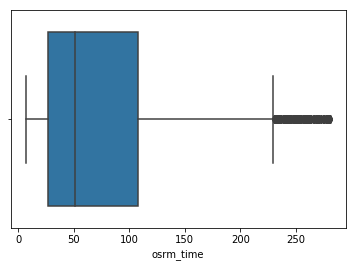

In [75]:
sns.boxplot(df_final['osrm_time'])

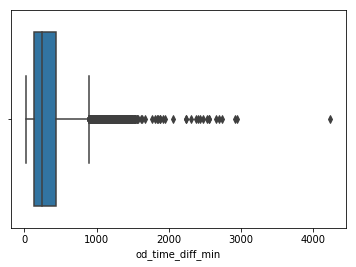

In [76]:
sns.boxplot(df_final['od_time_diff_min'])

In [77]:
q1=df_final['od_time_diff_min'].quantile(0.25)
q3=df_final['od_time_diff_min'].quantile(0.75)
iqr=q3-q1

df_final = df_final[(df_final['od_time_diff_min'] > q1 -1.5* iqr) & (df_final['od_time_diff_min'] < q3 +1.5* iqr)]

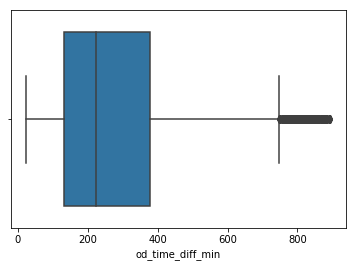

In [78]:
sns.boxplot(df_final['od_time_diff_min'])

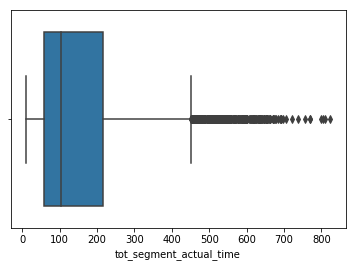

In [79]:
sns.boxplot(df_final['tot_segment_actual_time'])

In [80]:
q1=df_final['tot_segment_actual_time'].quantile(0.25)
q3=df_final['tot_segment_actual_time'].quantile(0.75)
iqr=q3-q1

df_final= df_final[(df_final['tot_segment_actual_time'] > q1 -1.5* iqr) & (df_final['tot_segment_actual_time'] < q3 +1.5* iqr)]

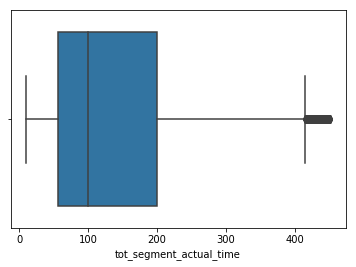

In [81]:
sns.boxplot(df_final['tot_segment_actual_time'])

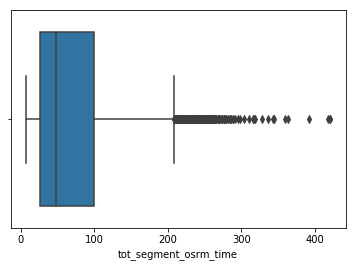

In [82]:
sns.boxplot(df_final['tot_segment_osrm_time'])

In [83]:
q1=df_final['tot_segment_osrm_time'].quantile(0.25)
q3=df_final['tot_segment_osrm_time'].quantile(0.75)
iqr=q3-q1

df_final = df_final[(df_final['tot_segment_osrm_time'] > q1 -1.5* iqr) & (df_final['tot_segment_osrm_time'] < q3 +1.5* iqr)]

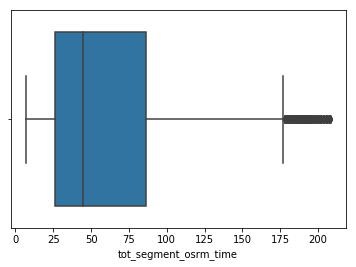

In [84]:
sns.boxplot(df_final['tot_segment_osrm_time'])

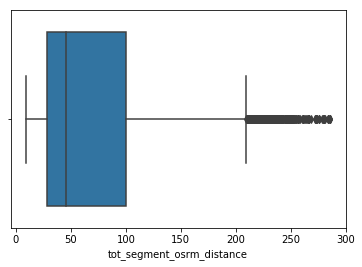

In [85]:
sns.boxplot(df_final['tot_segment_osrm_distance'])

In [86]:
q1=df_final['tot_segment_osrm_distance'].quantile(0.25)
q3=df_final['tot_segment_osrm_distance'].quantile(0.75)
iqr=q3-q1

df_final = df_final[(df_final['tot_segment_osrm_distance'] > q1 -1.5* iqr) & (df_final['tot_segment_osrm_distance'] < q3 +1.5* iqr)]

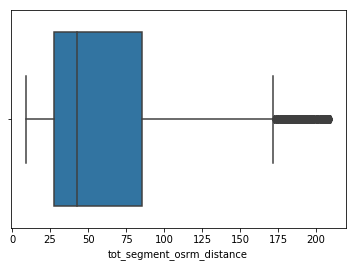

In [87]:
sns.boxplot(df_final['tot_segment_osrm_distance'])

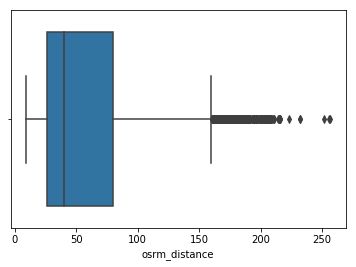

In [88]:
sns.boxplot(df_final['osrm_distance'])

In [89]:
q1=df_final['osrm_distance'].quantile(0.25)
q3=df_final['osrm_distance'].quantile(0.75)
iqr=q3-q1

df_final = df_final[(df_final['osrm_distance'] > q1 -1.5* iqr) & (df_final['osrm_distance'] < q3 +1.5* iqr)]

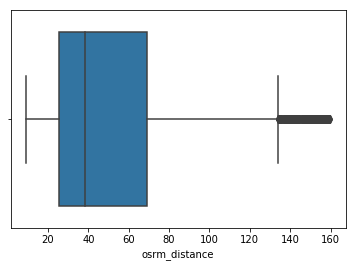

In [90]:
sns.boxplot(df_final['osrm_distance'])

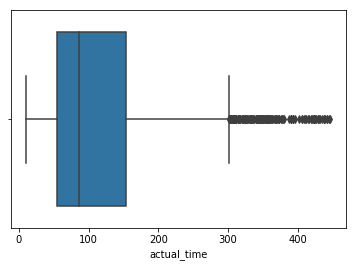

In [91]:
sns.boxplot(df_final['actual_time'])

In [92]:
q1=df_final['actual_time'].quantile(0.25)
q3=df_final['actual_time'].quantile(0.75)
iqr=q3-q1

df_final= df_final[(df_final['actual_time'] > q1 -1.5* iqr) & (df_final['actual_time'] < q3 +1.5* iqr)]

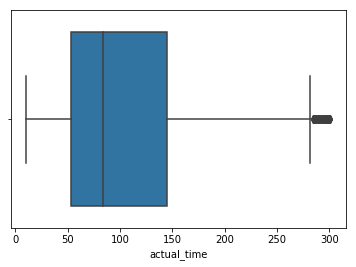

In [93]:
sns.boxplot(df_final['actual_time'])

# Checking relationship between aggregated fields 

### Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [94]:
stats.ks_2samp(df_final['start_scan_to_end_scan'],df_final['od_time_diff_min'])

Ks_2sampResult(statistic=0.016659295297066223, pvalue=0.30098613489083637)

Obs- P-value is greater than 0.05 so Fail to reject null hypothesis

### Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

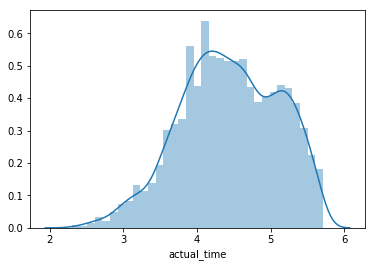

In [95]:
sns.distplot(np.log(df_final['actual_time']))

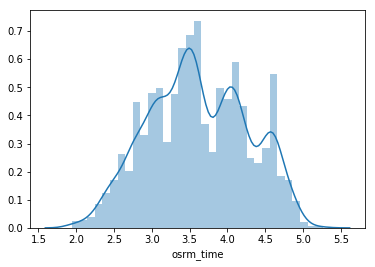

In [96]:
sns.distplot(np.log(df_final['osrm_time']))

In [97]:
stats.shapiro(np.log(df_final['actual_time']).sample(4999))

(0.986174464225769, 9.858703461150852e-22)

In [98]:
stats.shapiro(np.log(df_final['osrm_time']).sample(4999))

(0.9859834313392639, 6.97049764218084e-22)

In [99]:
stats.levene(np.log(df_final['actual_time']),np.log(df_final['osrm_time']))

LeveneResult(statistic=3.9762883601226067, pvalue=0.046165124951558285)

In [100]:
stats.ttest_ind(np.log(df_final['actual_time']).sample(30),np.log(df_final['osrm_time']).sample(30))

Ttest_indResult(statistic=4.578399331201984, pvalue=2.526393843600979e-05)

Obs- P value is less than 0.05 so reject the Null Hypothesis

### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Assumption-

Null Hypothesis- Both the times are same
Alternate Hypothesis- both times are different

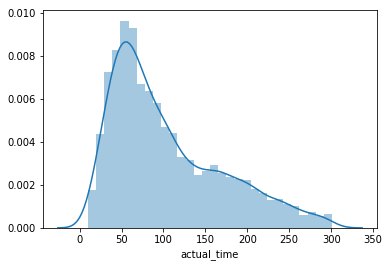

In [101]:
sns.distplot((df_final['actual_time']))

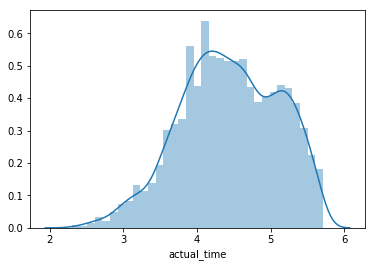

In [102]:
sns.distplot(np.log(df_final['actual_time']))

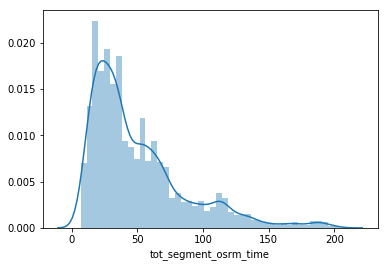

In [103]:
sns.distplot((df_final['tot_segment_osrm_time']))

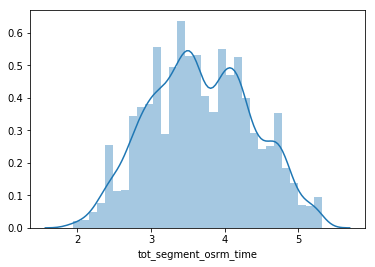

In [104]:
sns.distplot(np.log(df_final['tot_segment_osrm_time']))

In [105]:
stats.shapiro(np.log(df_final['actual_time']).sample(4999))

(0.9848222732543945, 9.102723414419155e-23)

In [106]:
stats.shapiro(np.log(df_final['tot_segment_osrm_time']).sample(4999))

(0.9916965365409851, 1.5580203594298413e-16)

In [107]:
stats.levene(np.log(df_final['actual_time']),np.log(df_final['tot_segment_osrm_time']))

LeveneResult(statistic=14.806411180374978, pvalue=0.00011967565036663679)

In [108]:
stats.ttest_ind(np.log(df_final['actual_time']).sample(30),np.log(df_final['tot_segment_osrm_time']).sample(30))

Ttest_indResult(statistic=3.846610795668833, pvalue=0.00030038276702369155)

Obs- P-value is less than 0.05 so reject null hypothesis

### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

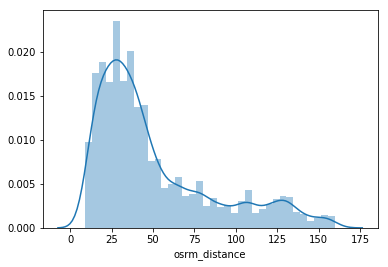

In [109]:
sns.distplot((df_final['osrm_distance']))

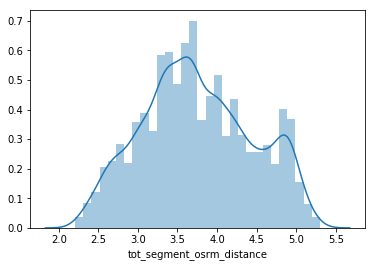

In [110]:
sns.distplot(np.log(df_final['tot_segment_osrm_distance']))

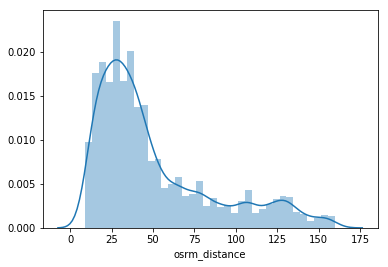

In [111]:
sns.distplot((df_final['osrm_distance']))

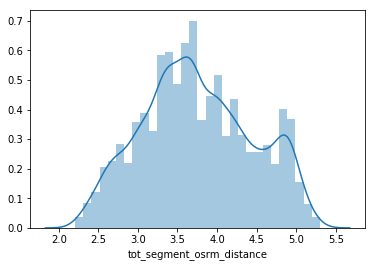

In [112]:
sns.distplot(np.log(df_final['tot_segment_osrm_distance']))

In [113]:
stats.shapiro(np.log(df_final['osrm_distance']).sample(4999))

(0.9776262044906616, 2.396409785304755e-27)

In [114]:
stats.shapiro(np.log(df_final['tot_segment_osrm_distance']).sample(4999))

(0.9819023609161377, 8.669191848306967e-25)

In [115]:
stats.levene(np.log(df_final['osrm_distance']),np.log(df_final['tot_segment_osrm_distance']))

LeveneResult(statistic=6.2722220153478565, pvalue=0.012276164606815729)

In [116]:
stats.ttest_ind(np.log(df_final['osrm_distance']).sample(30),np.log(df_final['tot_segment_osrm_distance']).sample(30))

Ttest_indResult(statistic=-0.03309915059050576, pvalue=0.9737091647058074)

Obs- P-value is greater than 0.05 so Fail to reject null hypothesis

### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

Assumption-

Null Hypothesis- Both the times are same
Alternate Hypothesis- both times are different

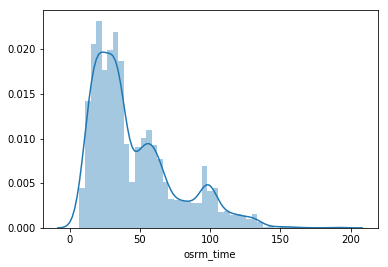

In [117]:
sns.distplot((df_final['osrm_time']))

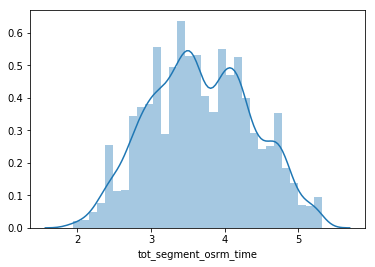

In [118]:
sns.distplot(np.log(df_final['tot_segment_osrm_time']))

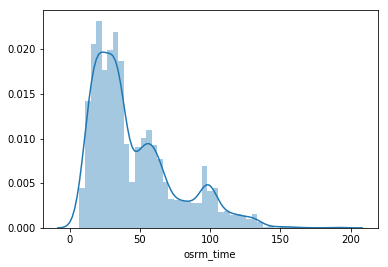

In [119]:
sns.distplot((df_final['osrm_time']))

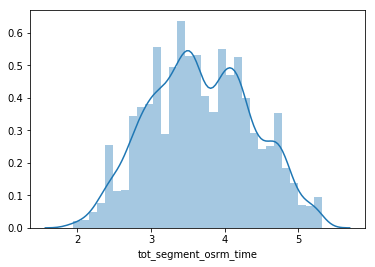

In [120]:
sns.distplot(np.log(df_final['tot_segment_osrm_time']))

In [121]:
stats.shapiro(np.log(df_final['osrm_time']).sample(4999))

(0.986405074596405, 1.5051522617166591e-21)

In [122]:
stats.shapiro(np.log(df_final['tot_segment_osrm_time']).sample(4999))

(0.9913012385368347, 5.625362193164052e-17)

In [123]:
stats.levene(np.log(df_final['osrm_time']),np.log(df_final['tot_segment_osrm_time']))

LeveneResult(statistic=33.88022393220087, pvalue=5.993639415217049e-09)

In [124]:
stats.ttest_ind(np.log(df_final['osrm_time']).sample(30),np.log(df_final['tot_segment_osrm_time']).sample(30))

Ttest_indResult(statistic=0.08351227595953718, pvalue=0.9337317875634984)

Obs- P-value is greater than 0.05 so Fail to reject null hypothesis

# Do one-hot encoding of categorical variables (like route_type)

In [125]:
df2=pd.get_dummies(df["route_type"])

In [126]:
pd.concat([df,df2], axis=1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,Carting,FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,1.272727,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,1.111111,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,2.285714,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,1.750000,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,1.200000,1,0
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,1.363636,1,0
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719,4.666667,1,0
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362,1.909091,1,0
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648,1.000000,1,0
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434,4.333333,1,0


In [127]:
df_final.drop(["route_type"],axis=1,inplace=True)

In [128]:
# importing the required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()
  
# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
df_final["actual_time"] = scaler.fit_transform(df_final[["actual_time"]])
df_final["actual_time"]

trip_uuid
trip-153671042288605164    0.457045
trip-153671046011330457    0.168385
trip-153671055416136166    0.175258
trip-153671066201138152    0.048110
trip-153671066826362165    0.185567
trip-153671074033284934    0.518900
trip-153671079956500691    0.044674
trip-153671090980523004    0.171821
trip-153671110078355292    0.024055
trip-153671122262300031    0.800687
trip-153671128962918389    0.340206
trip-153671173668736946    0.116838
trip-153671174968648046    0.343643
trip-153671191949943656    0.835052
trip-153671202698783427    0.549828
trip-153671225291120891    0.728522
trip-153671236229420701    0.436426
trip-153671237597058150    0.793814
trip-153671240266732246    0.632302
trip-153671256526597871    0.522337
trip-153671262893947351    0.635739
trip-153671279791474803    0.518900
trip-153671287611744830    0.426117
trip-153671289374432394    0.560137
trip-153671292681185799    0.130584
trip-153671306463580546    0.254296
trip-153671307622926083    0.446735
trip-1536713106834

In [130]:
df_final["tot_segment_actual_time"] = scaler.fit_transform(df_final[["tot_segment_actual_time"]])

In [131]:
df_final["tot_segment_osrm_time"] = scaler.fit_transform(df_final[["tot_segment_osrm_time"]])

In [132]:
df_final["tot_segment_osrm_distance"] = scaler.fit_transform(df_final[["tot_segment_osrm_distance"]])

In [133]:
df_final["start_scan_to_end_scan"] = scaler.fit_transform(df_final[["start_scan_to_end_scan"]])       

In [134]:
df_final["actual_distance_to_destination"] = scaler.fit_transform(df_final[["actual_distance_to_destination"]])       

In [135]:
df_final["osrm_time"] = scaler.fit_transform(df_final[["osrm_time"]])       

In [136]:
df_final["osrm_distance"] = scaler.fit_transform(df_final[["osrm_distance"]])       

In [137]:
df_final["od_time_diff_min"] = scaler.fit_transform(df_final[["od_time_diff_min"]])       

C:\Users\pinki\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [138]:
df_final.head()

,source_center,source_name,destination_center,destination_name,trip_creation_time,route_schedule_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,...,d_code,d_state,s_city,s_place,s_code,s_state,trip_creation_year,trip_creation_month,trip_creation_day,od_time_diff_min
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,0.180460,0.463148,...,D,Karnataka,Tumkur,Veersagr,I,Karnataka,2018,9,12,0.181401
trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,0.088506,0.058974,...,IP,Maharashtra,Mumbai Hub (Maharashtra),None,None,None,2018,9,12,0.088404
trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,2018-09-12 00:02:34.161600,2018-09-12 03:13:03.432532,0.190805,0.112529,...,Dc,Tamil Nadu,Chennai,Porur,DPC,Tamil Nadu,2018,9,12,0.191734
trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,0.086207,0.000708,...,Dc,Tamil Nadu,Chennai,Chrompet,DPC,Tamil Nadu,2018,9,12,0.086108
trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,0.141379,0.096850,...,None,None,HBR Layout PC (Karnataka),None,None,None,2018,9,12,0.175660


### One comparison between Min-Max scaler and Standard scaler

C:\Users\pinki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\pinki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


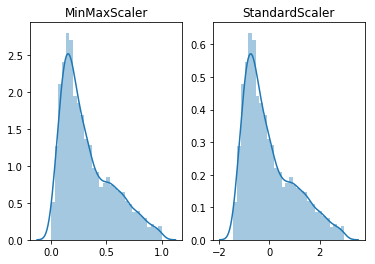

In [139]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
MinMaxScaler = MinMaxScaler()
plt.subplot(121)
plt.title('MinMaxScaler')
sns.distplot(MinMaxScaler.fit_transform(df_final[["actual_time"]]))
plt.subplot(122)
plt.title('StandardScaler')
sns.distplot(std_scale.fit_transform(df_final[["actual_time"]]))

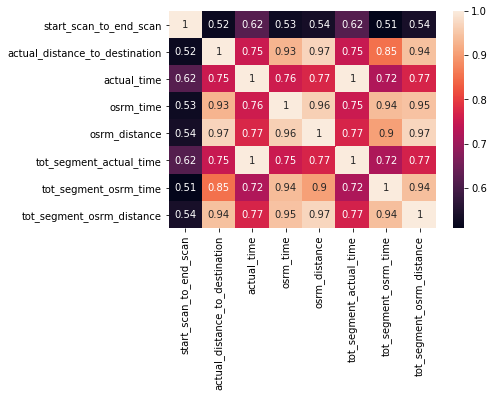

In [140]:
sns.heatmap(df_final[['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance',
                     'tot_segment_actual_time', 'tot_segment_osrm_time','tot_segment_osrm_distance']].corr(),annot=True)

Obs- All theses columns are highly correlated

Recommendations-

1. Focus on creating more warehouses in other states(Delhi,MP,Hyderabad) as many orders being created from cities of these states.

2. If we add more warehouses it will help during peak seasons.

3. buy more carts and trucks for such condition to meet.